1. What is Simple Linear Regression?
    - Simple Linear Regression is a statistical technique that models the relationship between one independent variable and one dependent variable by fitting a straight line to the data.

2. What are the key assumptions of Simple Linear Regression?
    - The key assumptions of Simple Linear Regression are that the relationship between the independent and dependent variables is linear, the observations are independent, the residuals have constant variance (homoscedasticity), the residuals are normally distributed, and there is no perfect multicollinearity (which is not relevant when there is only one predictor).

3. What is heteroscedasticity, and why is it important to address in regression models?
    - Heteroscedasticity occurs when the variance of the residuals is not constant across all levels of the independent variable. This is important because it violates the assumptions of regression, can make estimates less efficient, and can affect the validity of hypothesis tests.

4. What is Multiple Linear Regression?
    - Multiple Linear Regression is a statistical method that models the relationship between a dependent variable and two or more independent variables.

5. What is polynomial regression, and how does it differ from linear
regression?
    - Polynomial Regression is a form of regression analysis in which the relationship between the independent variable and the dependent variable is modeled as an n-th degree polynomial. Unlike simple linear regression, which fits a straight line, polynomial regression can fit curves by including higher‑order terms such as X^2 or X^3.

6. Implement a Python program to fit a Simple Linear Regression model to
the following sample data:

● X = [1, 2, 3, 4, 5]

● Y = [2.1, 4.3, 6.1, 7.9, 10.2]

Plot the regression line over the data points.

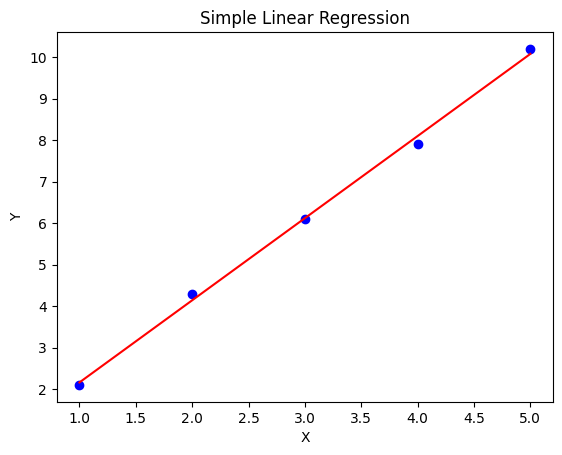

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

model = LinearRegression()
model.fit(X, Y)

plt.scatter(X, Y, color='blue')
plt.plot(X, model.predict(X), color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simple Linear Regression')
plt.show()

7. Fit a Multiple Linear Regression model on this sample data:

● Area = [1200, 1500, 1800, 2000]

● Rooms = [2, 3, 3, 4]

● Price = [250000, 300000, 320000, 370000]

Check for multicollinearity using VIF and report the results.

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

data = pd.DataFrame({
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
})

X = data[['Area', 'Rooms']]
y = data['Price']

model = LinearRegression().fit(X, y)

# VIF calculation
X_const = sm.add_constant(X)
vif = pd.DataFrame()
vif['Variable'] = X_const.columns
vif['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
print(vif)

  Variable        VIF
0    const  34.210526
1     Area   7.736842
2    Rooms   7.736842


8. Implement polynomial regression on the following data:

● X = [1, 2, 3, 4, 5]

● Y = [2.2, 4.8, 7.5, 11.2, 14.7]

Fit a 2nd-degree polynomial and plot the resulting curve.

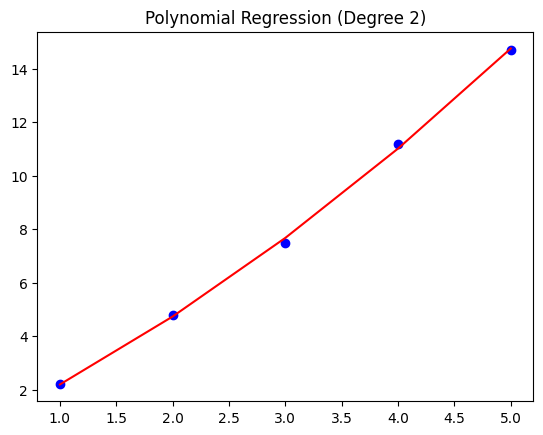

In [3]:
from sklearn.preprocessing import PolynomialFeatures

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression().fit(X_poly, Y)

plt.scatter(X, Y, color='blue')
plt.plot(X, model.predict(X_poly), color='red')
plt.title('Polynomial Regression (Degree 2)')
plt.show()

9. Create a residuals plot for a regression model trained on this data:

● X = [10, 20, 30, 40, 50]

● Y = [15, 35, 40, 50, 65]

Assess heteroscedasticity by examining the spread of residuals.

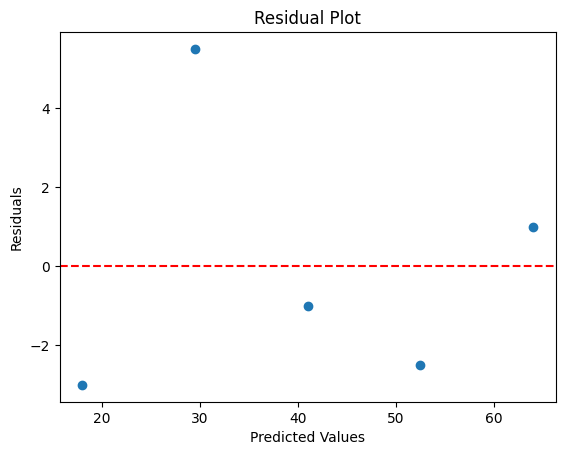

In [4]:
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

model = LinearRegression().fit(X, Y)
residuals = Y - model.predict(X)

plt.scatter(model.predict(X), residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

10. Imagine you are a data scientist working for a real estate company. You need to predict house prices using features like area, number of rooms, and location.
However, you detect heteroscedasticity and multicollinearity in your regression model. Explain the steps you would take to address these issues and ensure a robust model.
    - Heteroscedasticity can be addressed by transforming the dependent variable, using robust standard errors, or applying weighted least squares. Multicollinearity can be reduced by removing or combining correlated predictors, applying dimensionality reduction techniques such as Principal Component Analysis, centering variables, or using ridge regression. After making adjustments, it is important to re‑evaluate the model assumptions to ensure they are met.